In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\ss\Downloads\DataSet_Emails.csv')
df

,Unnamed: 0,message_id,text,label,label_text,subject,message,date
0,0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13
...,...,...,...,...,...,...,...,...
31711,31711,14628,"credit netco start up plan louise ,\nattached ...",0,ham,credit netco start up plan,"louise ,\nattached is the electronic version o...",2002-01-07
31712,31712,16049,"everything you are looking for hello , visit o...",1,spam,everything you are looking for,"hello , visit our amazing\nonline shop !\nnows...",2005-03-26
31713,31713,18024,start date : 2 / 5 / 02 ; hourahead hour : 18 ...,0,ham,start date : 2 / 5 / 02 ; hourahead hour : 18 ;,start date : 2 / 5 / 02 ; hourahead hour : 18 ...,2002-02-05
31714,31714,1639,corhshucker daren - - - -\nthe invoices are be...,0,ham,corhshucker,daren - - - -\nthe invoices are being paid by ...,2000-09-19


In [3]:
df.dtypes

Unnamed: 0     int64
message_id     int64
text          object
label          int64
label_text    object
subject       object
message       object
date          object
dtype: object

In [4]:
df.shape

(31716, 8)

In [5]:
df.isnull().sum()

Unnamed: 0      0
message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


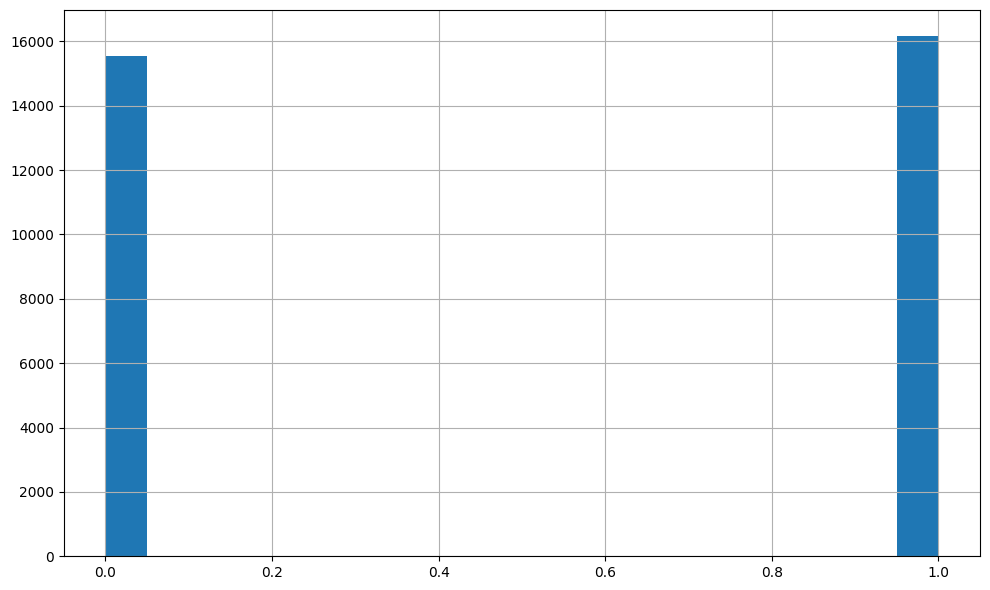

In [8]:
import matplotlib.pyplot as plt
df['label'].hist(figsize=(10, 6), bins=20)
plt.tight_layout()
plt.show()

In [9]:
spam_texts = df[df['label'] == 1]['text']
ham_texts = df[df['label'] == 0]['text']

In [10]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


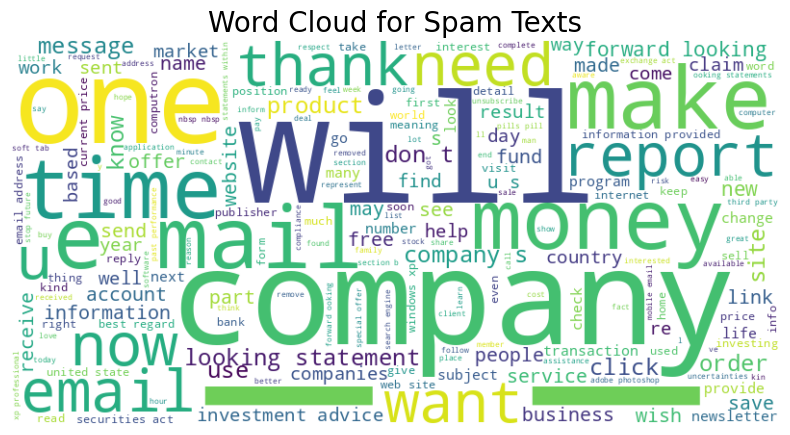

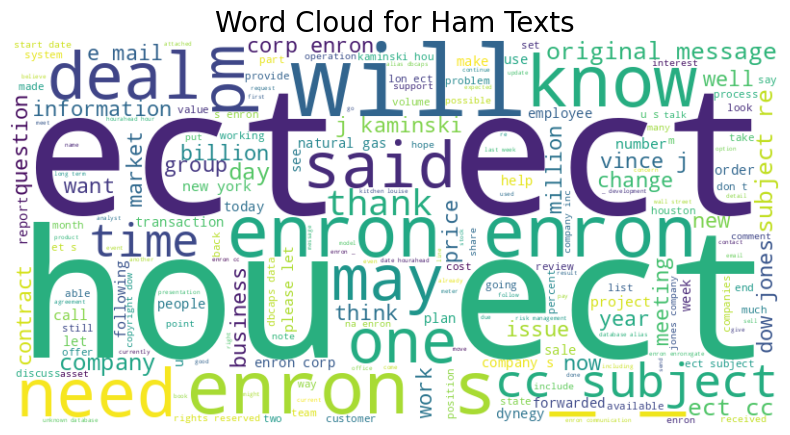

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

spam_text = ' '.join(spam_texts.dropna())
ham_text = ' '.join(ham_texts.dropna())


generate_wordcloud(spam_text, 'Word Cloud for Spam Texts')
generate_wordcloud(ham_text, 'Word Cloud for Ham Texts')

In [12]:
df['text'] = df['text'].str.lower().fillna('')

In [13]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import nltk
from nltk.tokenize import word_tokenize

# Télécharger les ressources nécessaires (seulement une fois)
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
df['text'] = df['text'].astype(str)

df['tokens'] = df['text'].apply(word_tokenize)

In [16]:
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
stop_words = set(stopwords.words('english'))

df['tokens_clean'] = df['tokens'].apply(
    lambda words: [word for word in words if word.lower() not in stop_words]
)

In [18]:
import string

df['text_clean'] = df['text'].astype(str).apply(
    lambda x: ''.join(char for char in x if char not in string.punctuation)
)

In [19]:
import nltk
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stems_list = []

for row in df['text_clean']:
    tokens = nltk.word_tokenize(row)
    stems = [stemmer.stem(word) for word in tokens]
    stems_list.append(stems)

df['stems'] = stems_list

In [40]:
df.columns

Index(['Unnamed: 0', 'message_id', 'text', 'label', 'label_text', 'subject',
       'message', 'date', 'tokens', 'tokens_clean', 'text_clean', 'stems'],
      dtype='object')

In [20]:
import pandas as pd

# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

display(df.head(3))

,Unnamed: 0,message_id,text,label,label_text,subject,message,date,tokens,tokens_clean,text_clean,stems
0,0,33214,any software just for 15 $ - 99 $ understanding oem software\nlead me not into temptation ; i can find the way myself .\n# 3533 . the law disregards trifles .,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into temptation ; i can find the way myself .\n# 3533 . the law disregards trifles .,2005-06-18,"[any, software, just, for, 15, $, -, 99, $, understanding, oem, software, lead, me, not, into, temptation, ;, i, can, find, the, way, myself, ., #, 3533, ., the, law, disregards, trifles, .]","[software, 15, $, -, 99, $, understanding, oem, software, lead, temptation, ;, find, way, ., #, 3533, ., law, disregards, trifles, .]",any software just for 15 99 understanding oem software\nlead me not into temptation i can find the way myself \n 3533 the law disregards trifles,"[ani, softwar, just, for, 15, 99, understand, oem, softwar, lead, me, not, into, temptat, i, can, find, the, way, myself, 3533, the, law, disregard, trifl]"
1,1,11929,"perspective on ferc regulatory action client conf call today , jun e 19 th , 2 : 00 pm edt\nperspective on ferc regulatory action client conference call\ntoday , tuesday , june 19 th\n2 : 00 pm edt\nhost : ray niles , power / natural gas analyst\nspeaker : steve bergstrom , president & coo of dynegy\nsteve bergstrom , president and chief operating officer of dynegy , will join\nus at 2 : 00 p . m . today for a conference call discussion of the recent ferc\naction imposing price controls in the west . the discussion will be followed\nby q & a .\nquestions to be explored include :\nwhat are the implications of the ferc action , for dyn and the industry as a\nwhole ?\nwhat is the earnings impact ?\nwhat are the risks of further re - regulation ?\nand whatever else is on your minds\nwe attach two recent notes on the ferc action for your reference .\ncall in replay reservation\n800 - 229 - 0281 us 800 - 642 - 1687 us 1073259\n706 - 645 - 9237 int ' l 706 - 645 - 9291 int ' l\nreplay until 6 / 22 , 11 : 59 pm\nraymond c . niles\npower / natural gas research\nsalomon smith barney\n( 212 ) 816 - 2807\nray . niles @ ssmb . com\ns",0,ham,"perspective on ferc regulatory action client conf call today , jun e","19 th , 2 : 00 pm edt\nperspective on ferc regulatory action client conference call\ntoday , tuesday , june 19 th\n2 : 00 pm edt\nhost : ray niles , power / natural gas analyst\nspeaker : steve bergstrom , president & coo of dynegy\nsteve bergstrom , president and chief operating officer of dynegy , will join\nus at 2 : 00 p . m . today for a conference call discussion of the recent ferc\naction imposing price controls in the west . the discussion will be followed\nby q & a .\nquestions to be explored include :\nwhat are the implications of the ferc action , for dyn and the industry as a\nwhole ?\nwhat is the earnings impact ?\nwhat are the risks of further re - regulation ?\nand whatever else is on your minds\nwe attach two recent notes on the ferc action for your reference .\ncall in replay reservation\n800 - 229 - 0281 us 800 - 642 - 1687 us 1073259\n706 - 645 - 9237 int ' l 706 - 645 - 9291 int ' l\nreplay until 6 / 22 , 11 : 59 pm\nraymond c . niles\npower / natural gas research\nsalomon smith barney\n( 212 ) 816 - 2807\nray . niles @ ssmb . com\ns",2001-06-19,"[perspective, on, ferc, regulatory, action, client, conf, call, today, ,, jun, e, 19, th, ,, 2, :, 00, pm, edt, perspective, on, ferc, regulatory, action, client, conference, call, today, ,, tuesday, ,, june, 19, th, 2, :, 00, pm, edt, host, :, ray, niles, ,, power, /, natural, gas, analyst, speaker, :, steve, bergstrom, ,, president, &, coo, of, dynegy, steve, bergstrom, ,, president, and, chief, operating, officer, of, dynegy, ,, will, join, us, at, 2, :, 00, p, ., m, ., today, for, a, conference, call, discussion, of, the, recent, ferc, action, imposing, price, controls, in, the, west, ., ...]","[

In [21]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [27]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.7 MB 10.8 MB/s eta 0:00:01
   --------------------- ------------------ 4.7/8.7 MB 13.3 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 15.8 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 15.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ----- ---------------------------------- 5.8/38.5 MB 27.1 MB/s eta 0:00:02
   ------------ --------------------------- 11.8/38.5 MB 27.6 MB/s eta 0:00:01
   ------------------ --------------------- 18.1/38.5 MB 25.5 MB/s eta 0:00:01
   ---------------------- ----------------- 21.5/38.5 MB 23.4 MB/s eta 0:00:01
   -------------------------- ------------- 25.2/38.5 MB 22.1 MB/s eta 0:00:01
   ----------------------------- ---------- 28.6/38.5 MB 21.3 MB/s eta 0:00:01
  


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text_clean'])  # text_clean = texte nettoyé

# Pour l'utiliser dans un modèle :
y = df['label']  # variable cible (ex. 0 = ham, 1 = spam)

# Entraîner un modèle par exemple :
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
! pip install seaborn 


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Accuracy (Decision Tree): 0.9579129886506935

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3084
           1       0.95      0.97      0.96      3260

    accuracy                           0.96      6344
   macro avg       0.96      0.96      0.96      6344
weighted avg       0.96      0.96      0.96      6344


Confusion Matrix (Decision Tree):
[[2929  155]
 [ 112 3148]]


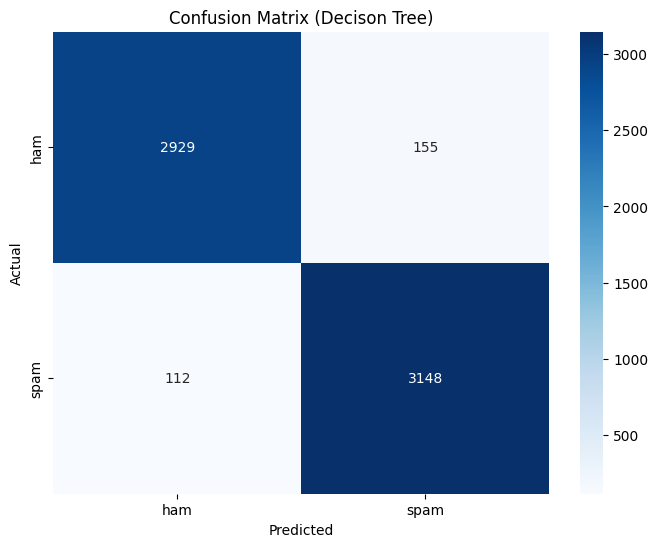

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Entraîner le modèle
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prédictions
y_pred_dt = dt_model.predict(X_test)

# Évaluer la précision
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))

# Display classification report and confusion matrix for more detailed evaluation
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix (Decision Tree):")
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decison Tree)')
plt.show()

In [39]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3752861 stored elements and shape (31716, 153537)>
  Coords	Values
  (0, 19290)	0.0902345398665726
  (0, 126751)	0.2935955213938709
  (0, 78677)	0.11137680439449305
  (0, 59054)	0.054692088289220155
  (0, 2195)	0.1287859276901822
  (0, 13491)	0.16774434479491443
  (0, 139914)	0.19350751393218396
  (0, 99321)	0.21101955698218977
  (0, 82981)	0.1955120320145728
  (0, 89475)	0.09098853922501624
  (0, 97628)	0.08002148990072613
  (0, 74853)	0.11814505150751896
  (0, 133579)	0.3316139553034171
  (0, 31010)	0.08642214679760143
  (0, 57729)	0.13529992992092713
  (0, 134258)	0.09992433893908427
  (0, 145742)	0.13193298044269075
  (0, 94631)	0.1929060122279466
  (0, 6117)	0.36352009279749264
  (0, 82682)	0.19384577708051412
  (0, 46306)	0.41187120387846193
  (0, 137494)	0.3962220436026427
  (1, 59054)	0.0480090008078509
  (1, 134258)	0.13157116007753564
  (1, 105108)	0.13356546139454925
  :	:
  (31715, 148151)	0.04397347744234941
  (

Accuracy (Naïve Bayes): 0.9864438839848676

Classification Report (Naïve Bayes):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3084
           1       0.99      0.98      0.99      3260

    accuracy                           0.99      6344
   macro avg       0.99      0.99      0.99      6344
weighted avg       0.99      0.99      0.99      6344


Confusion Matrix (Naïve Bayes):
[[3047   37]
 [  49 3211]]


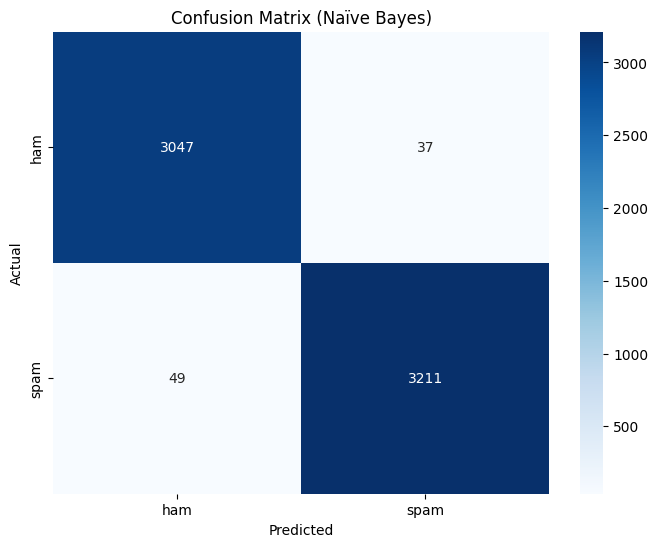

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the accuracy
print("Accuracy (Naïve Bayes):", accuracy_score(y_test, y_pred_nb))

# Display classification report and confusion matrix for more detailed evaluation
print("\nClassification Report (Naïve Bayes):")
print(classification_report(y_test, y_pred_nb))

print("\nConfusion Matrix (Naïve Bayes):")
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naïve Bayes)')
plt.show()

Accuracy (SVM): 0.9903846153846154

Classification Report (SVM):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3084
           1       0.98      1.00      0.99      3260

    accuracy                           0.99      6344
   macro avg       0.99      0.99      0.99      6344
weighted avg       0.99      0.99      0.99      6344


Confusion Matrix (SVM):
[[3034   50]
 [  11 3249]]


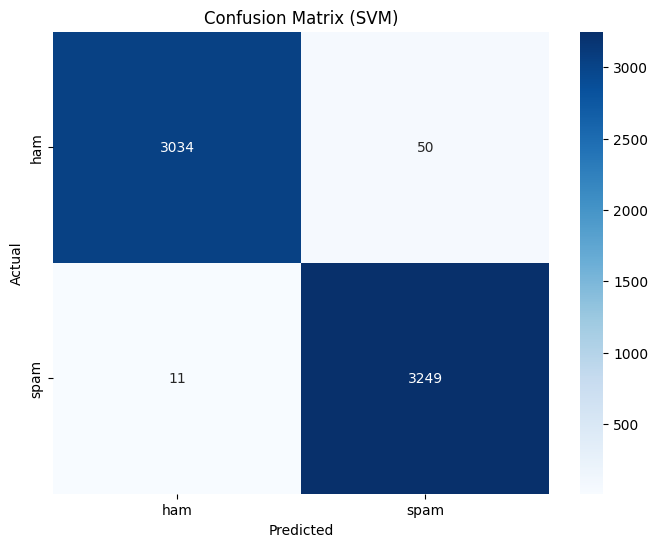

In [33]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Créer et entraîner le modèle
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)

# Prédictions
y_pred_svc = svc_model.predict(X_test)

# Évaluer la précision
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svc))

# Display classification report and confusion matrix for more detailed evaluation
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svc))

print("\nConfusion Matrix (SVM):")
cm = confusion_matrix(y_test, y_pred_svc)
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X (cleaned text data) and y (labels) are available from previous steps

# Re-initialize TfidfVectorizer and transform the data
# In a real scenario, you would save and load the fitted vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['text_clean'])


# Initialize the models
dt_model = DecisionTreeClassifier(random_state=42)
svc_model = LinearSVC()
nb_model = MultinomialNB()

# Perform cross-validation (e.g., 5 folds)
cv_scores_dt = cross_val_score(dt_model, X_tfidf, y, cv=5)
cv_scores_svc = cross_val_score(svc_model, X_tfidf, y, cv=5)
cv_scores_nb = cross_val_score(nb_model, X_tfidf, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores (Decision Tree):", cv_scores_dt)
print("Mean cross-validation accuracy (Decision Tree):", cv_scores_dt.mean())

print("\nCross-validation scores (SVM):", cv_scores_svc)
print("Mean cross-validation accuracy (SVM):", cv_scores_svc.mean())

print("\nCross-validation scores (Naïve Bayes):", cv_scores_nb)
print("Mean cross-validation accuracy (Naïve Bayes):", cv_scores_nb.mean())

Cross-validation scores (Decision Tree): [0.95964691 0.95585685 0.95585685 0.95727574 0.95648747]
Mean cross-validation accuracy (Decision Tree): 0.9570247628279847

Cross-validation scores (SVM): [0.99022699 0.98817594 0.98880656 0.99132902 0.99085606]
Mean cross-validation accuracy (SVM): 0.9898789144888498

Cross-validation scores (Naïve Bayes): [0.98392182 0.98139682 0.98155447 0.98250039 0.98202743]
Mean cross-validation accuracy (Naïve Bayes): 0.9822801853439733


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Define the parameter grid for LinearSVC
param_grid = {'C': [0.1, 1, 10, 100]} # You can add more parameters and values to tune

# Create a GridSearchCV object
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=5, scoring='accuracy') # cv is the number of cross-validation folds

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate the model with the best parameters on the test set
best_svc_model = grid_search.best_estimator_
y_pred_best_svc = best_svc_model.predict(X_test)
print("Accuracy on the test set with best parameters:", accuracy_score(y_test, y_pred_best_svc))

C:\Users\ss\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ss\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ss\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ss\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ss\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters: {'C': 1}
Best cross-validation accuracy: 0.9912501441716779
Accuracy on the test set with best parameters: 0.9903846153846154


In [42]:
import pickle

# Assuming 'best_svc_model' is your best trained model from GridSearchCV
# If you want to save the untuned SVM model, replace 'best_svc_model' with 'svc_model'
model_filename = 'model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(best_svc_model, file)

print(f"Best model saved to {model_filename}")

Best model saved to model.pkl


In [43]:
import pickle

# Sauvegarder le vectorizer entraîné
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Vectorizer sauvegardé sous 'vectorizer.pkl'")


✅ Vectorizer sauvegardé sous 'vectorizer.pkl'


In [44]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
